In [1]:
# only adjust settings in this cell
state = 'KS'
k = 4                 # the state has this number of districts
enumeration_limit = 10

In [2]:
filepath = 'C:\\districting-data-2020-reprojection\\'
filename = state + '_county.json'

from read import read_graph_from_json
G = read_graph_from_json( state, filepath + filename) 
k = G._k

In [3]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / k
print(f"When k = {k}, ideal_population = {round(ideal_population,2)}.")

When k = 4, ideal_population = 734470.0.


In [4]:
from optimization import iterative_refinement
from math import ceil, floor
import time

deviation = 1/2
max_deviation = 0.01 * ideal_population
plans = list()

while True:

    print("*****************************************")
    print(f"Trying deviation = {deviation}.")
    print("*****************************************")
    
    L = ceil( ideal_population - deviation )
    U = floor( ideal_population + deviation )

    start_time = time.perf_counter()
    plans += iterative_refinement(G, L, U, k, enumeration_limit=enumeration_limit, verbose=False)
    print("Total time =",round(time.perf_counter() - start_time,2))

    if deviation == max_deviation:
        break
    
    deviation *= 2
    deviation = min( deviation, max_deviation )
       

*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Total time = 3052.2
*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 4785.61
*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 3956.44
*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 3079.4
*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 9683.65
*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 10432.43
*****************************************
Trying deviation = 32.0.
*****************************************
Total time = 10624.0
*****

***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[4.0, 152], [4.0, 152], [7.0, 128], [8.0, 102], [53.0, 100], [81.0, 96], [150.0, 88], [235.0, 86], [282.0, 84], [295.0, 78], [315.0, 76], [937.0, 74], [1059.0, 70], [2464.0, 68], [3237.0, 66], [4115.0, 64]]


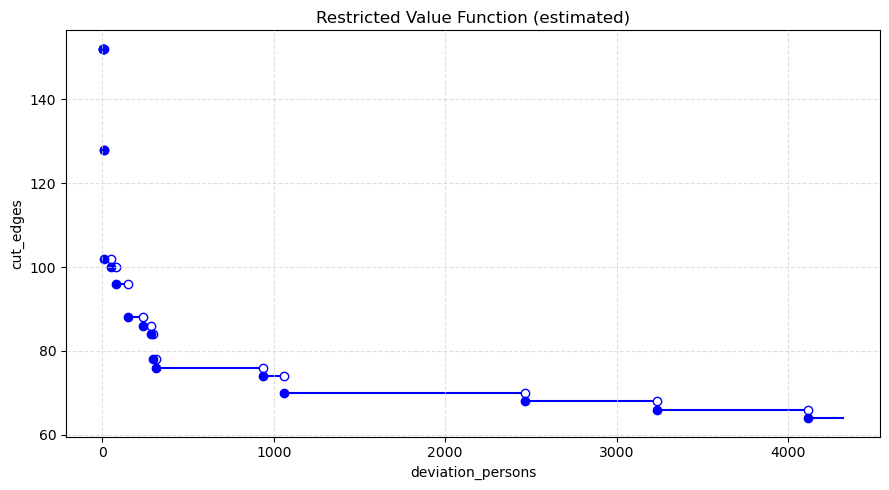

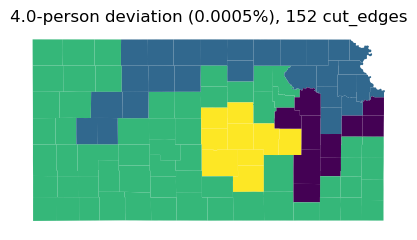

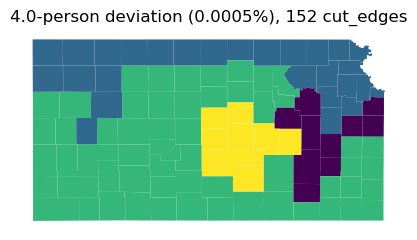

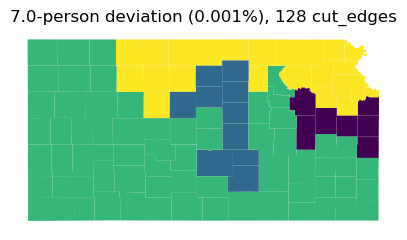

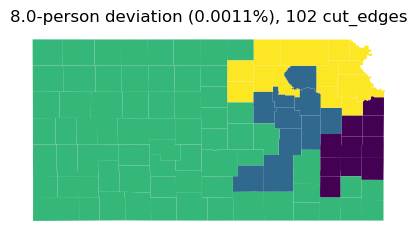

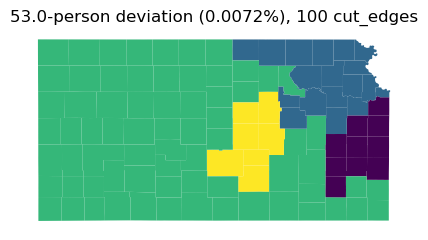

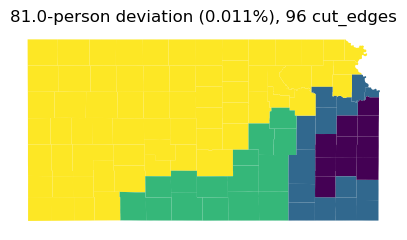

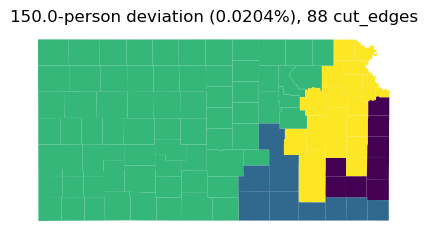

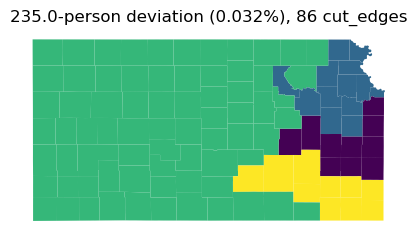

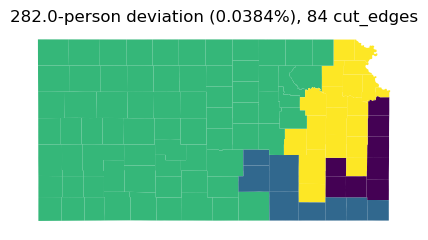

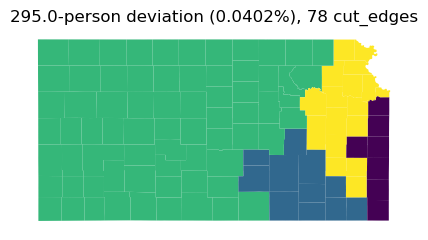

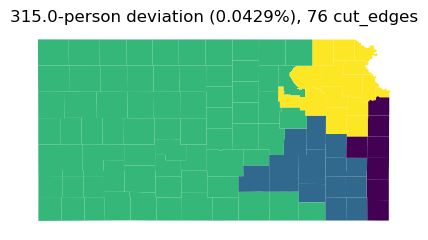

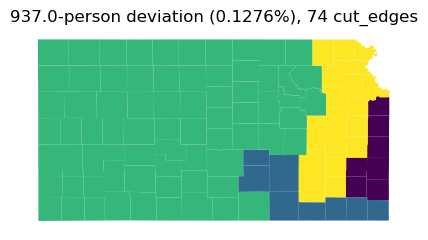

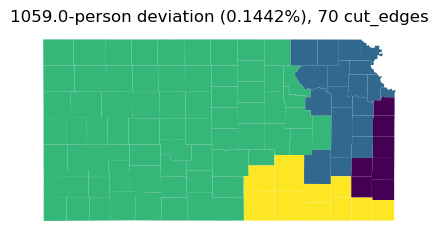

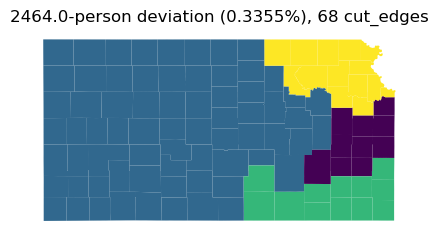

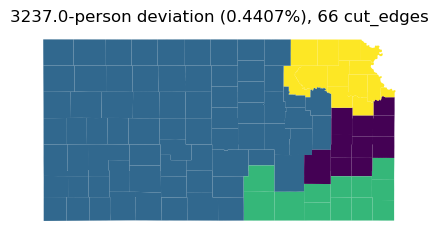

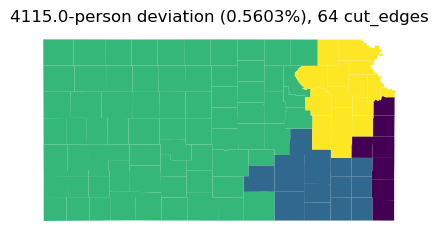

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[4.0, 68.38522320674049], [5.0, 67.95823324424717], [7.0, 61.016468780018755], [8.0, 53.56455353648915], [27.0, 52.847541874854976], [32.0, 52.49411678955266], [46.0, 51.68205412440069], [81.0, 50.38657935925994], [97.0, 50.365479871287036], [150.0, 47.12073714591785], [282.0, 46.509660449543716], [295.0, 44.41276004102903], [504.0, 42.99954930834638], [937.0, 42.99358271107732], [1105.0, 41.84190786300035], [4190.0, 41.30982850428849], [5439.0, 41.09627559902399], [5822.0, 39.847545950913265]]


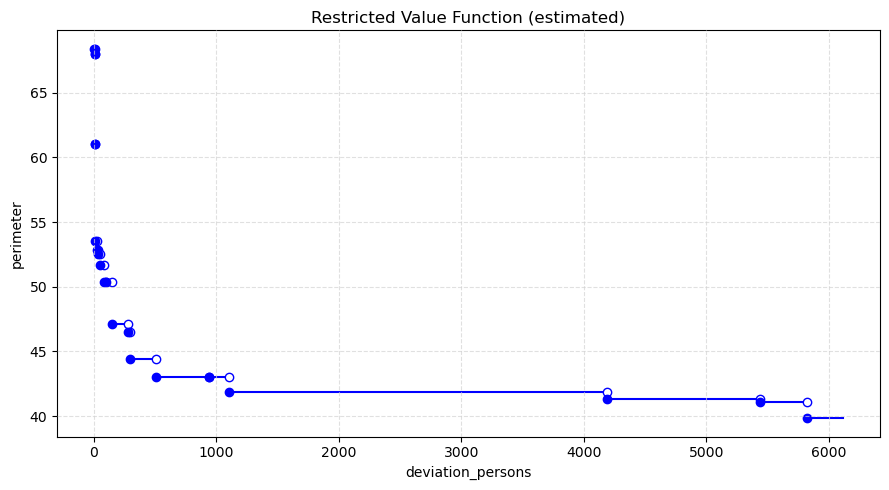

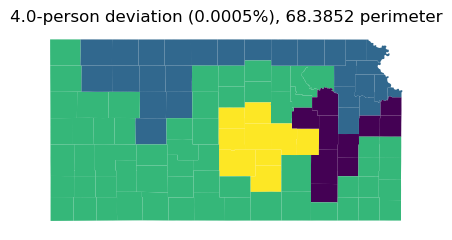

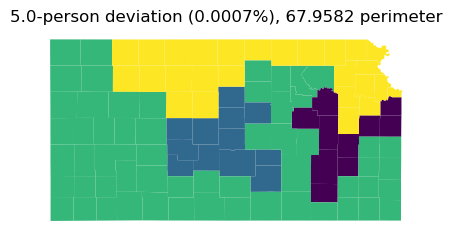

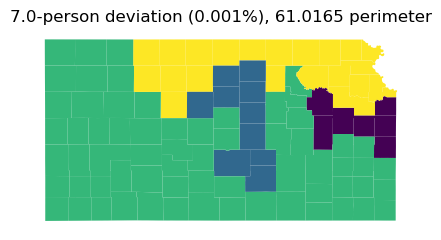

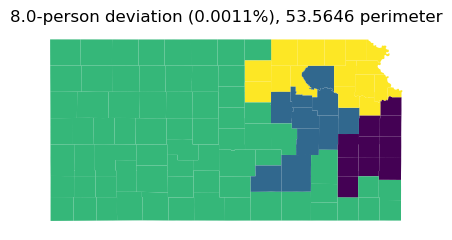

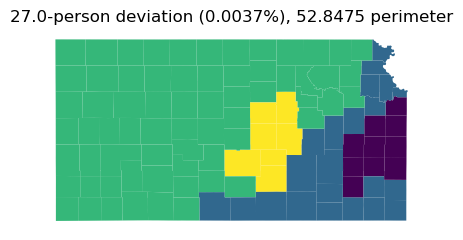

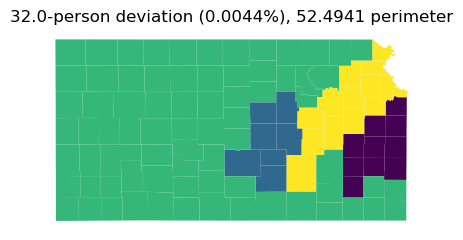

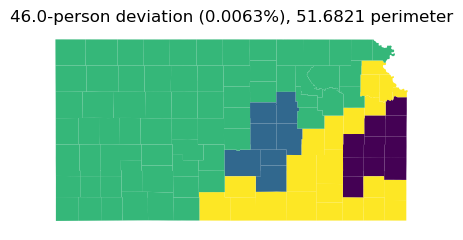

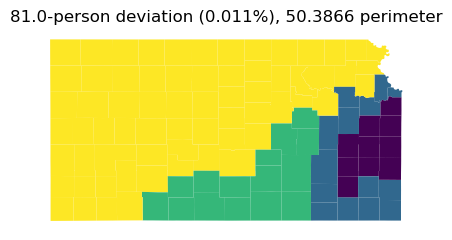

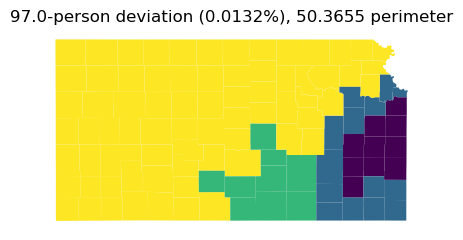

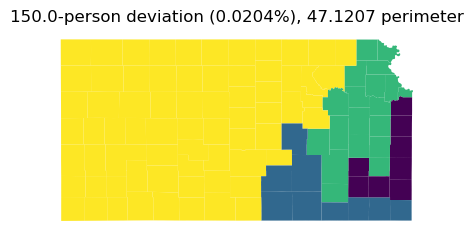

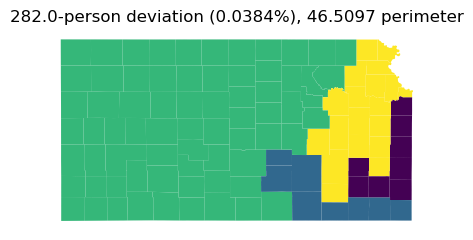

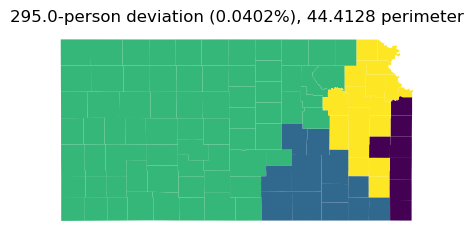

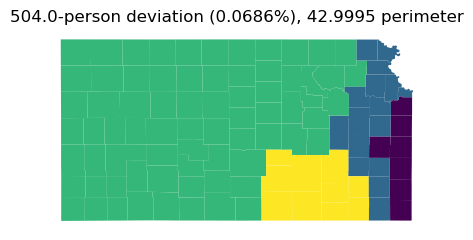

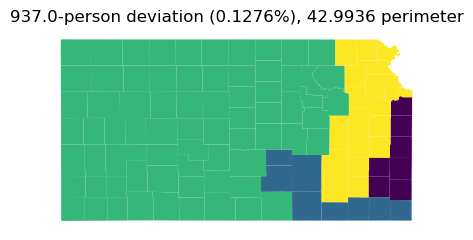

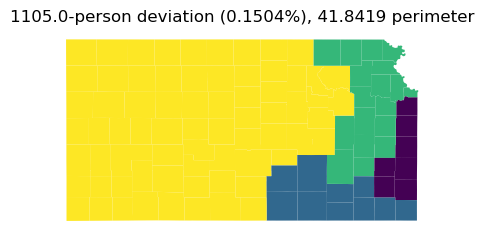

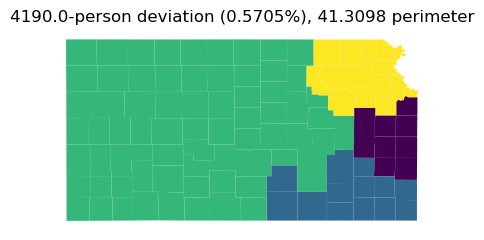

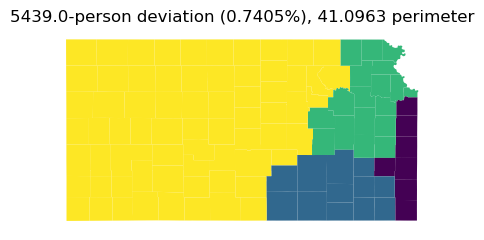

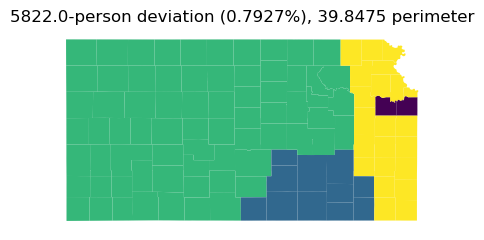

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[4.0, 4.676242457424785], [5.0, 4.629658994211127], [7.0, 4.034614919592191], [8.0, 3.277869785914562], [10.0, 3.2296823017692553], [11.0, 3.1602638021257228], [21.0, 3.137438438274912], [22.0, 3.049612246003658], [38.0, 3.0467446883880775], [69.0, 2.968705458448687], [100.0, 2.949080249754082], [224.0, 2.7791069078960327], [295.0, 2.6647340330728673], [368.0, 2.6311046460146237], [900.0, 2.568482312004412], [937.0, 2.4296627320310877], [1105.0, 2.392628627386489], [1694.0, 2.361255287801487], [1869.0, 2.3471116613240466], [3811.0, 2.27134529907396], [4190.0, 2.1448947206516578], [7226.0, 2.1405350324816235], [7305.0, 2.13795776648982]]


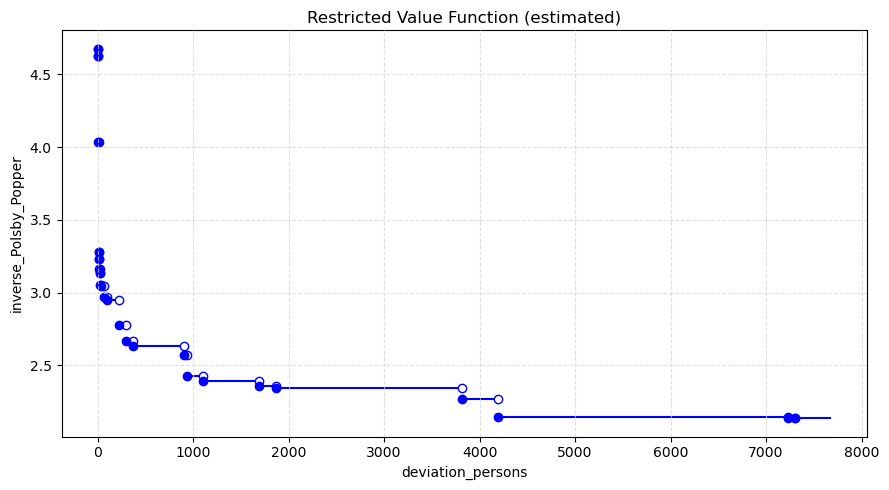

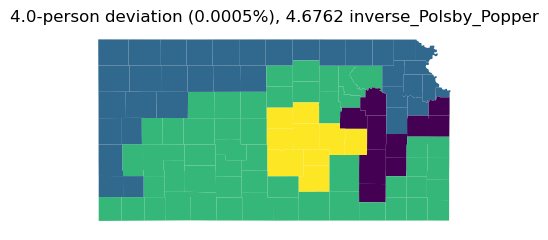

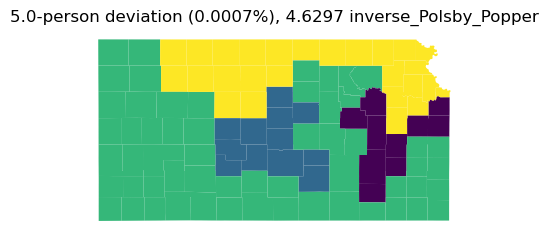

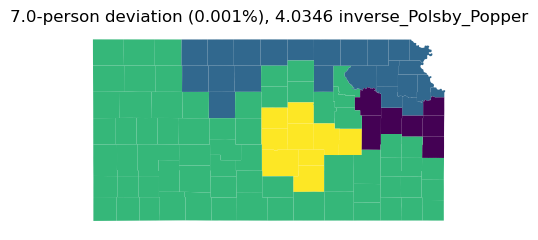

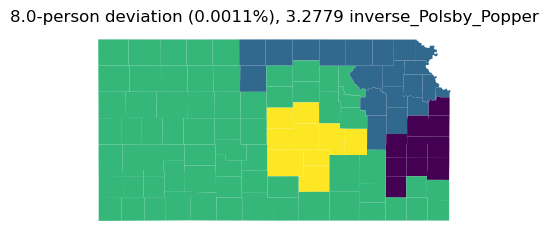

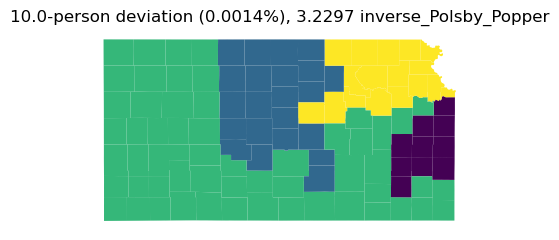

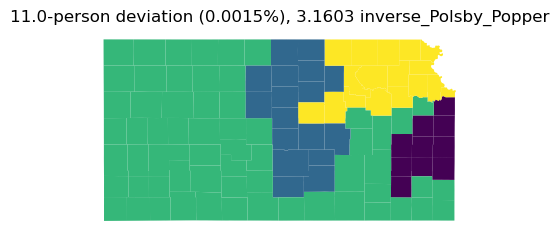

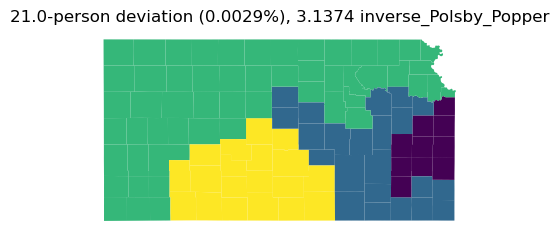

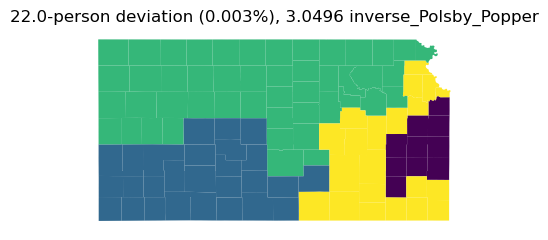

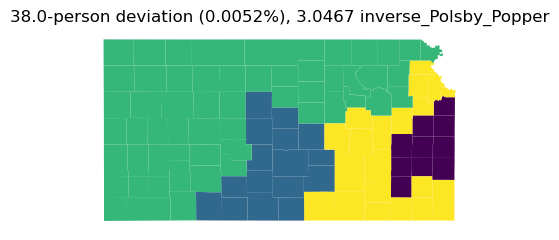

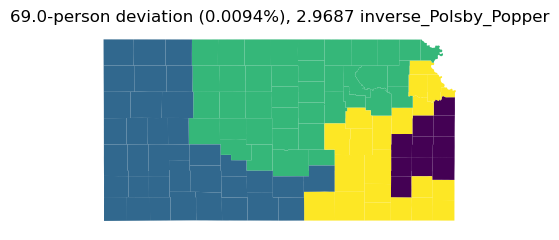

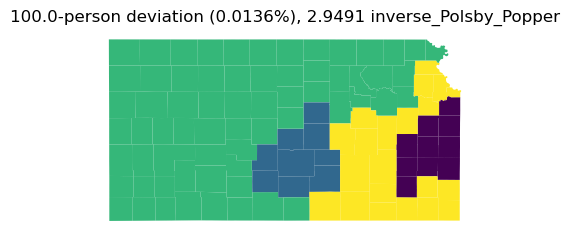

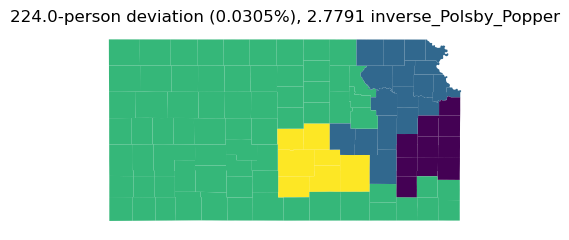

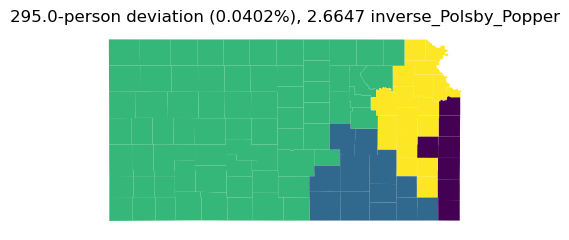

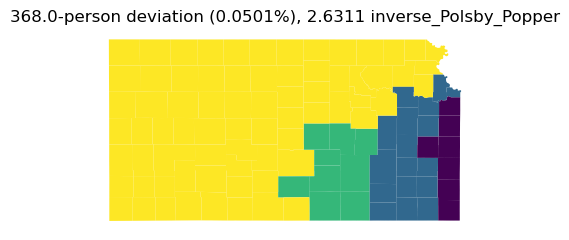

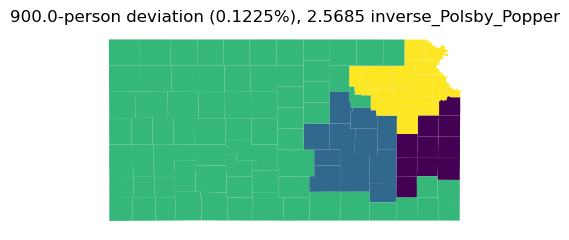

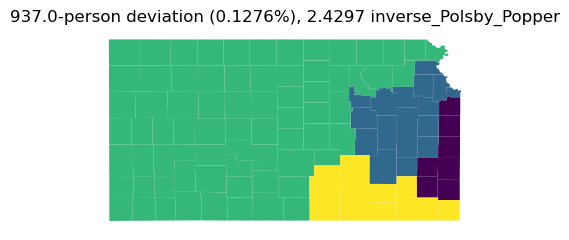

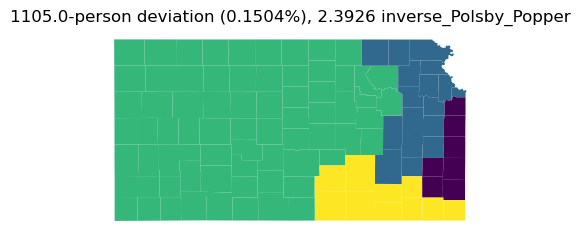

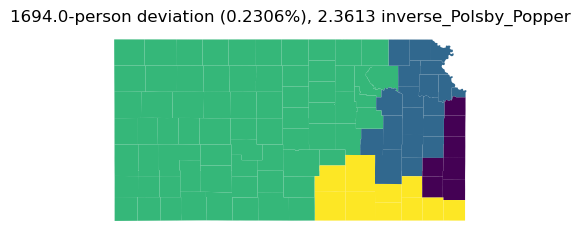

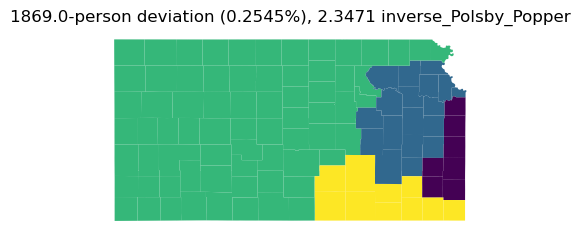

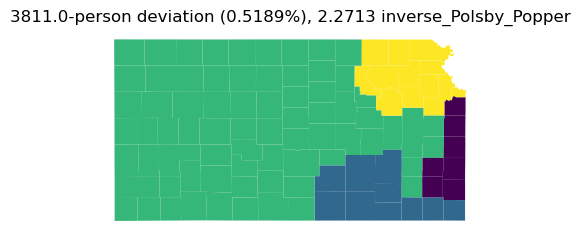

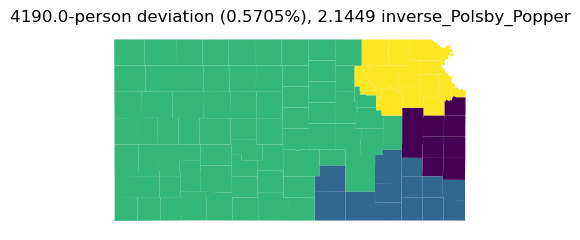

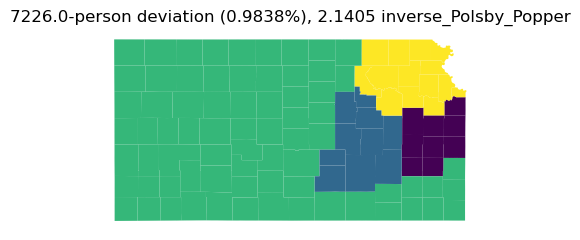

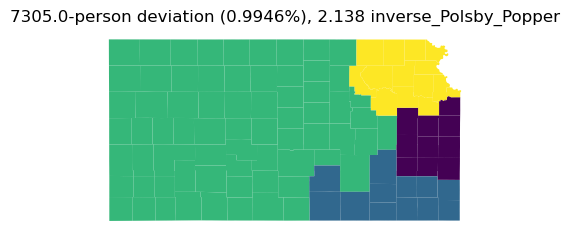

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[4.0, 0.26324525384525777], [7.0, 0.28921351117650784], [8.0, 0.36827599134836797], [15.0, 0.3724224779983085], [21.0, 0.3762069526799239], [24.0, 0.3826738042107315], [75.0, 0.3853057032369488], [100.0, 0.3883407197907388], [211.0, 0.39548167880472646], [224.0, 0.40187547594123174], [295.0, 0.40211232218262954], [323.0, 0.4032807883360168], [466.0, 0.41200889239859045], [504.0, 0.4411468762680403], [1105.0, 0.4459319833559546], [1478.0, 0.4571537298690867], [4019.0, 0.45806021879495556], [4190.0, 0.4764994815433573], [7226.0, 0.47794016039564935], [7305.0, 0.48437357133142717]]


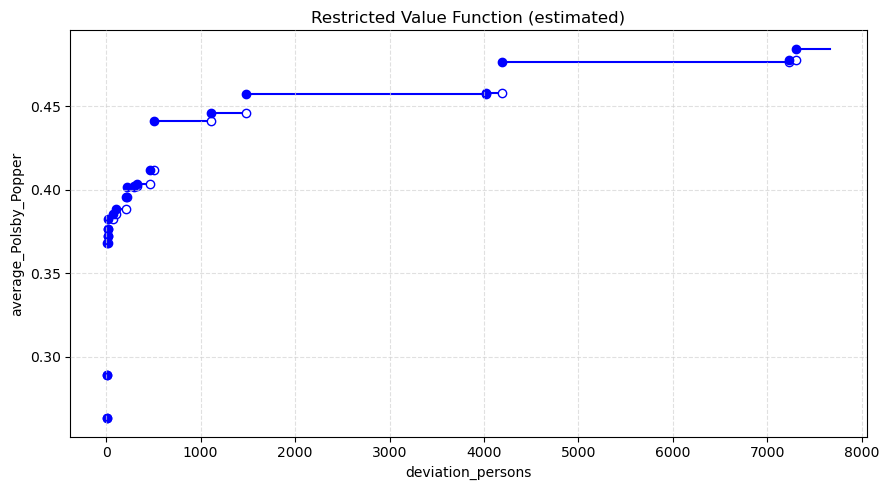

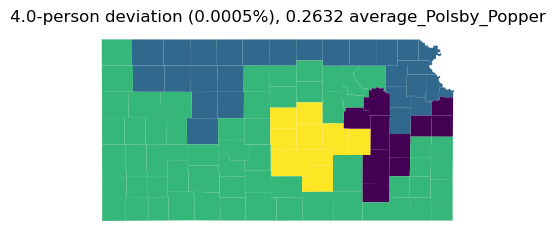

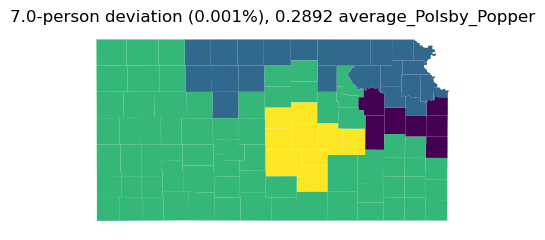

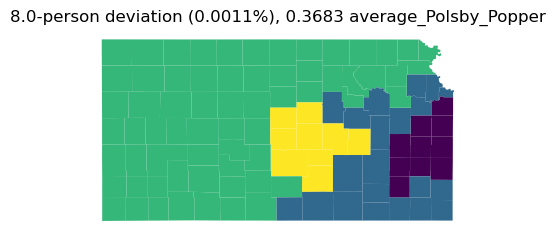

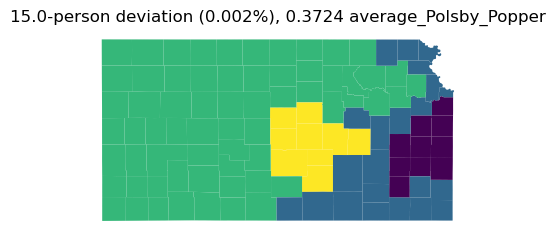

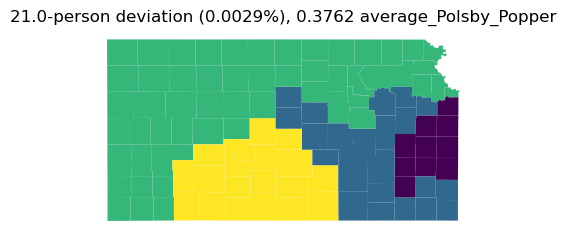

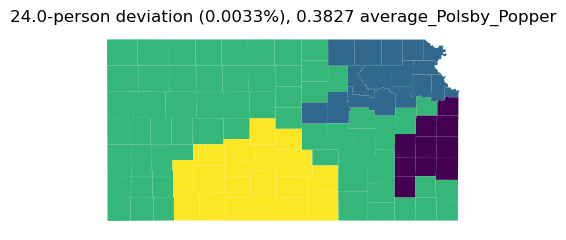

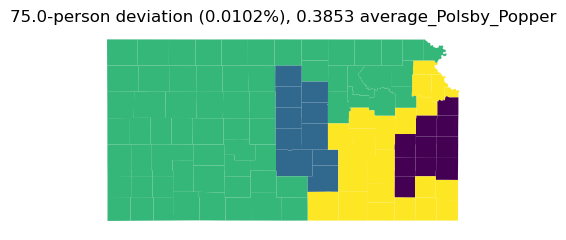

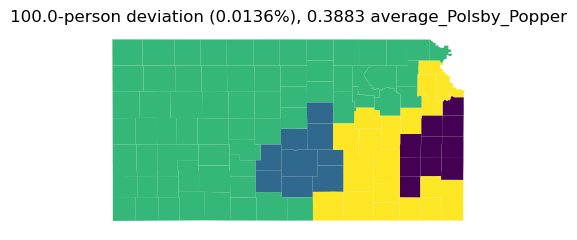

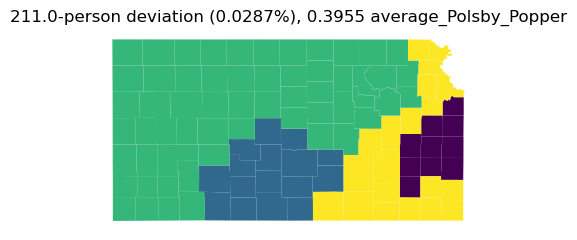

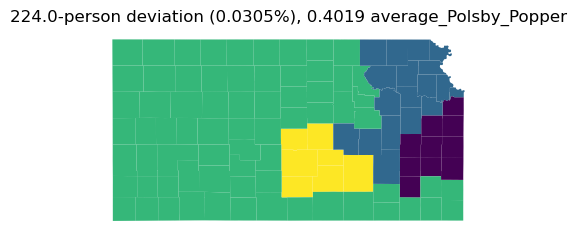

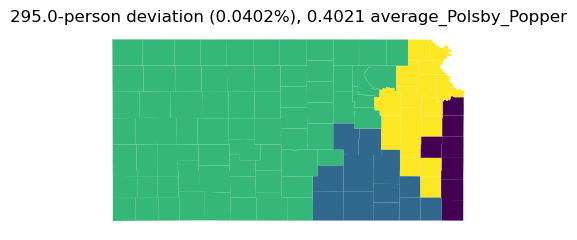

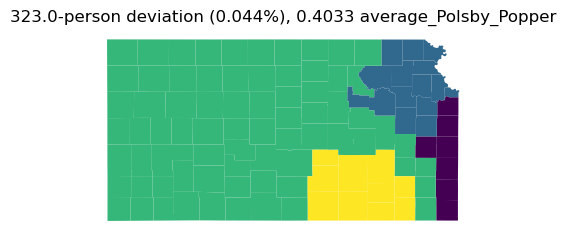

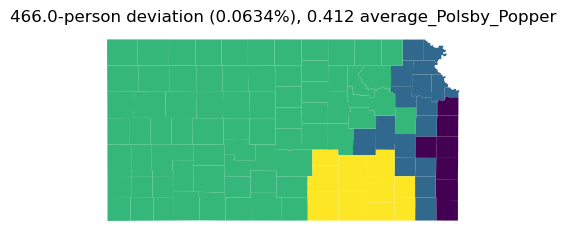

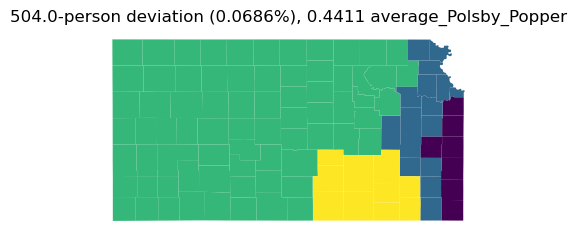

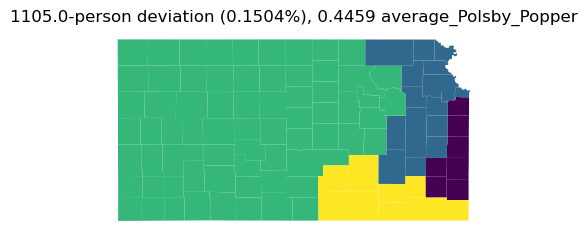

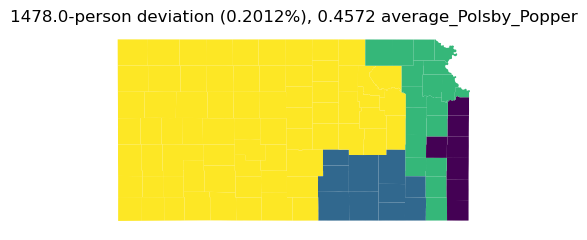

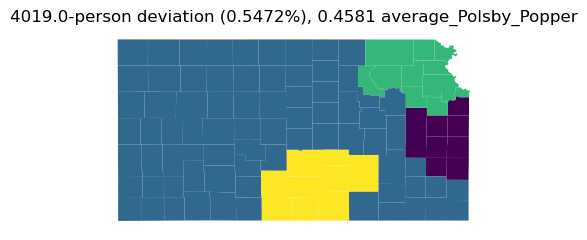

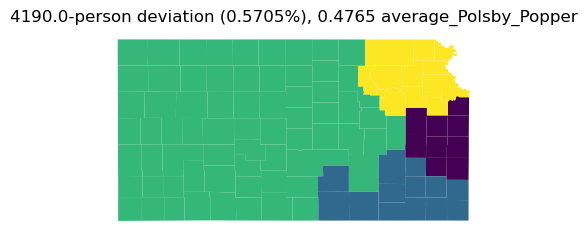

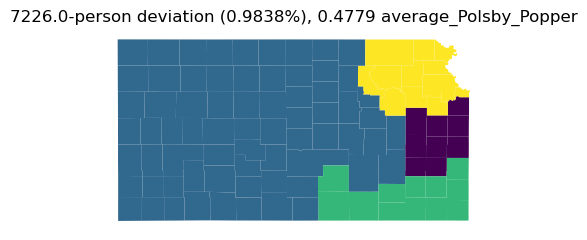

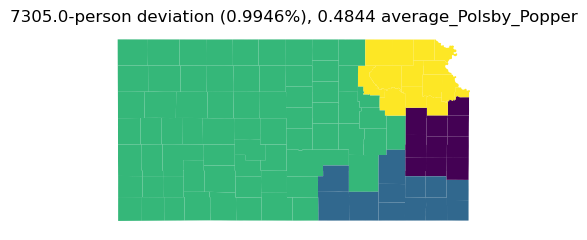

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[4.0, 0.1592434535184309], [5.0, 0.1705326740884489], [7.0, 0.219605144533977], [7.0, 0.219605144533977], [8.0, 0.22869378740338384], [32.0, 0.24013055646264508], [53.0, 0.24056392599984738], [53.0, 0.24056392599984738], [94.0, 0.24679340422354293], [150.0, 0.2776124508089337], [150.0, 0.2776124508089337], [180.0, 0.2870375120847687], [235.0, 0.31263576362630746], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [412.0, 0.34518901542370445], [937.0, 0.3663492360061187], [1798.0, 0.3810935297827451], [1869.0, 0.39779942779577276], [3811.0, 0.4347169597651818], [7131.0, 0.4385492364569628]]


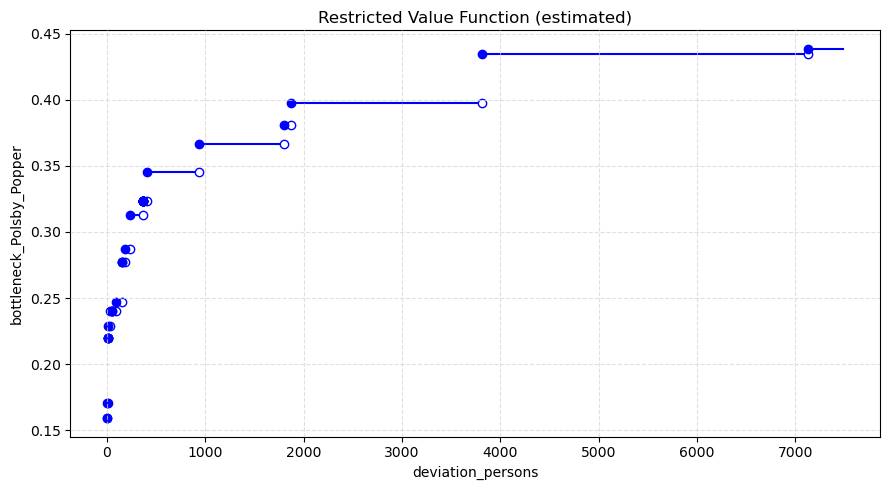

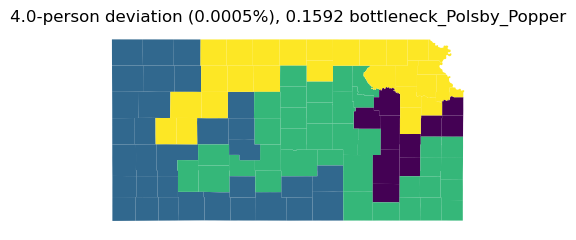

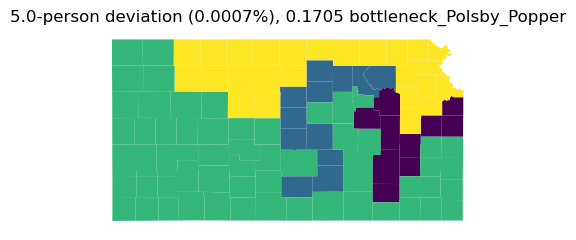

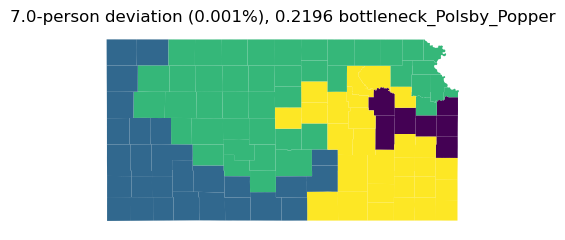

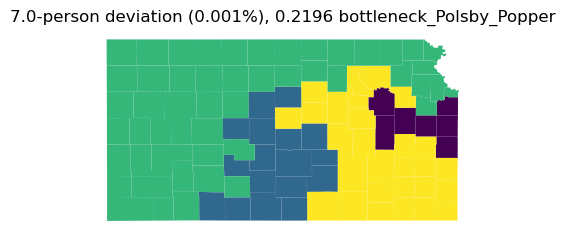

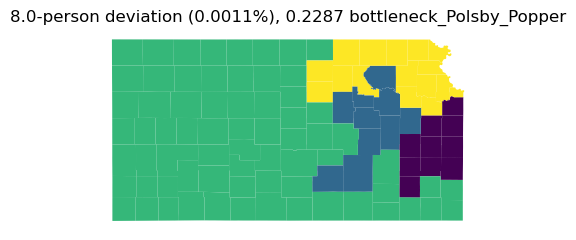

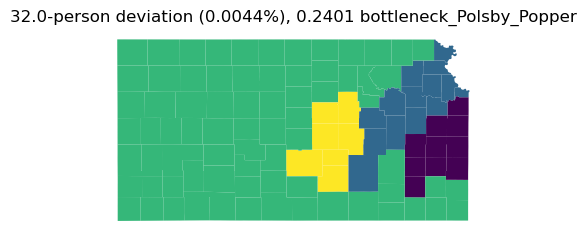

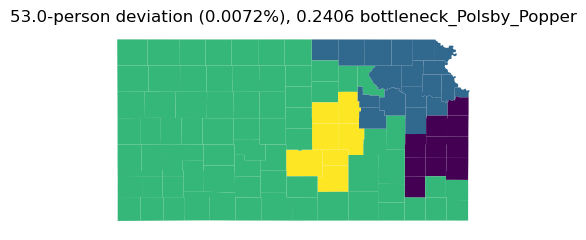

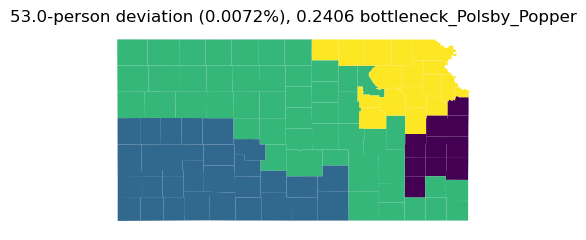

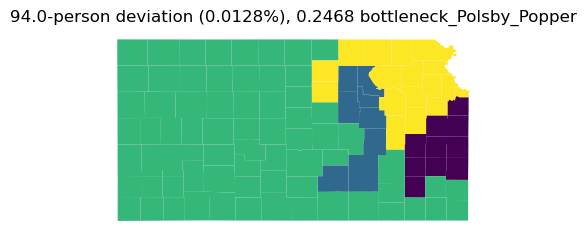

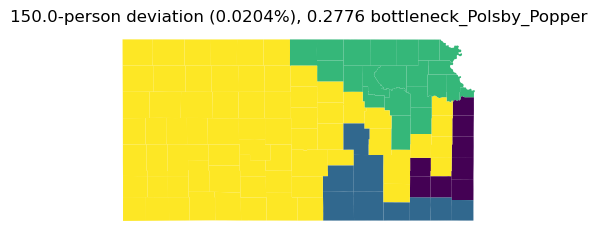

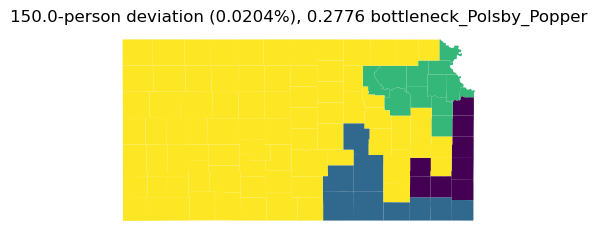

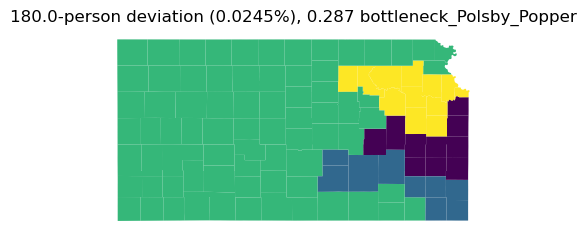

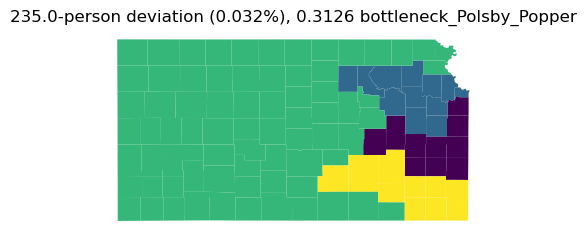

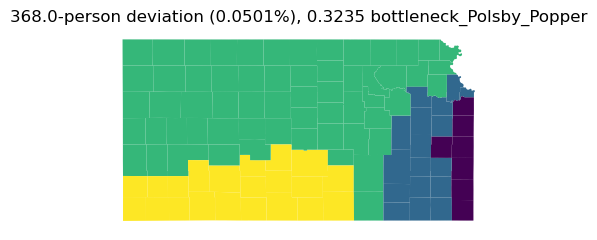

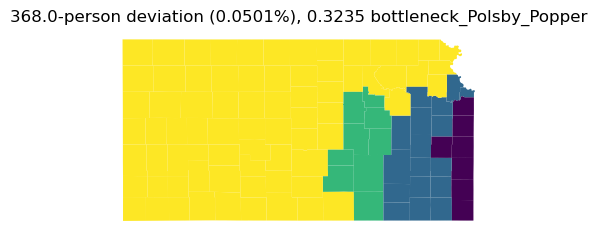

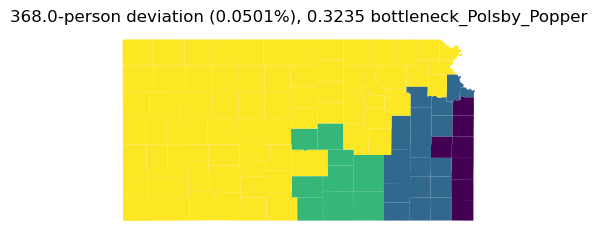

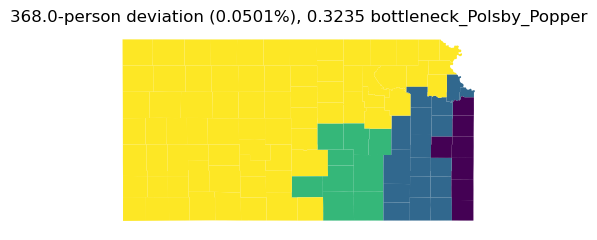

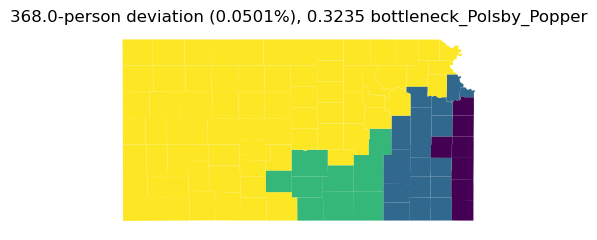

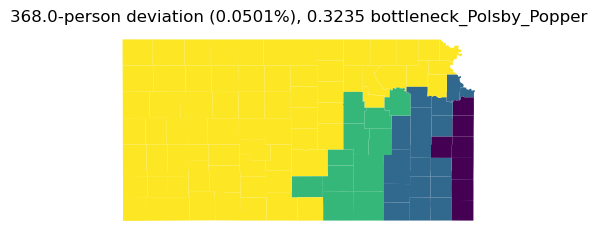

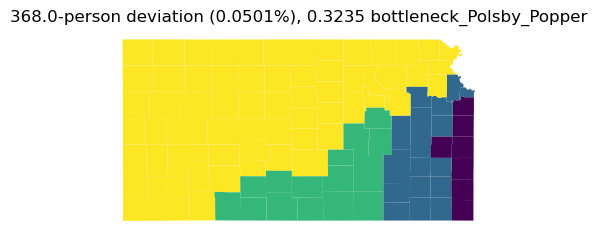

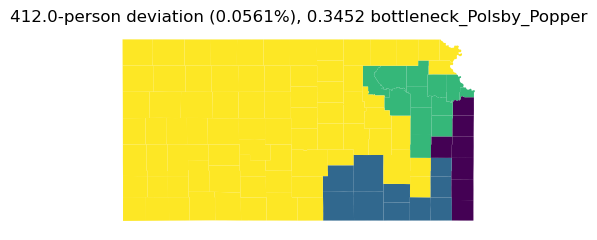

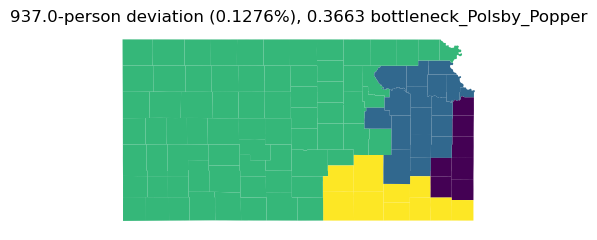

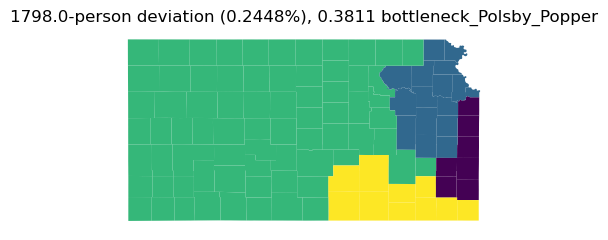

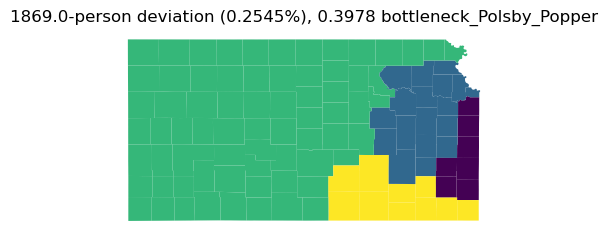

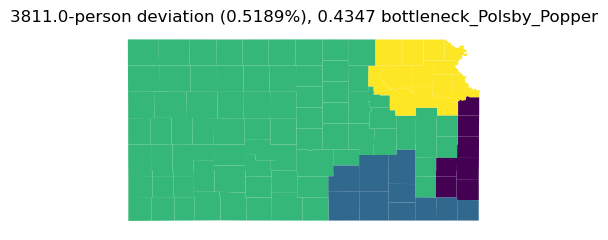

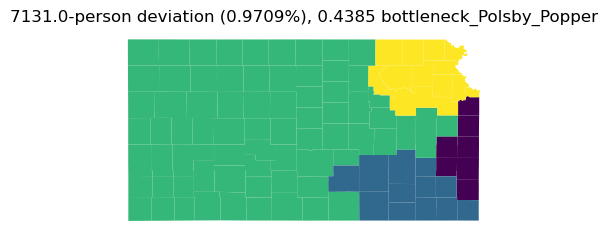

In [5]:
from pareto import ParetoFrontier
from metrics import *
from draw import draw_plan
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.shp'

# set dummy values... (because compute_obj checks plan feasibility...)
G._L = 0 
G._U = k * ideal_population
pareto = dict()

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    #print("Pareto front plans:", pareto[obj_type].plans)
    print("Pareto front objective values:", pareto[obj_type].objvals)
    
    # Set the limits accordingly
    pareto[obj_type].plot()   

    # Draw the plans from Pareto frontier
    pareto[obj_type].draw_plans()

In [8]:
print("plans =",plans)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
len(plans)

27930

In [10]:
for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    print("Pareto front plans:", pareto[obj_type].plans)


***************************************
obj_type = cut_edges
***************************************
Pareto front plans: [[[5, 11, 13, 21, 28, 42, 45, 62, 65, 76], [6, 10, 12, 15, 18, 24, 27, 29, 30, 31, 37, 41, 51, 61, 63, 64, 70, 74, 77, 79, 83, 84, 93, 95, 97, 101, 103], [0, 1, 2, 3, 7, 8, 14, 16, 17, 19, 22, 23, 25, 34, 35, 36, 38, 39, 40, 43, 44, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 67, 68, 69, 71, 72, 73, 75, 78, 80, 81, 82, 85, 87, 88, 89, 90, 91, 92, 94, 96, 98, 99, 100, 102, 104], [4, 9, 20, 26, 32, 33, 48, 66, 86]], [[5, 11, 13, 21, 28, 42, 45, 62, 65, 76], [6, 10, 12, 15, 18, 24, 27, 29, 30, 31, 37, 41, 46, 47, 58, 61, 63, 64, 70, 77, 78, 79, 89, 92, 95, 97, 103], [0, 1, 2, 3, 7, 8, 14, 16, 17, 19, 22, 23, 25, 34, 35, 36, 38, 39, 40, 43, 44, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 67, 68, 69, 71, 72, 73, 74, 75, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 96, 98, 99, 100, 101, 102, 104], [4, 9, 20, 26, 32, 33, 48, 66, 86]], [[5, 11, 13, 14, 21, 28, 30]